<a href="https://colab.research.google.com/github/Pandu98-pkh/DeepLearning/blob/main/01.%20Week%201/Notebook%20Assigment/Regression%20Infrared%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Infrared Dataset** ✨

## **1️⃣ Pemuatan dan Pemrosesan Data Awal**
### **1.1 Installasi**

In [1]:
#!pip install torch torchvision
#!pip install tensorflow
#!pip install numpy pandas matplotlib scikit-learn

### **1.2 Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder # untuk mengubah label kelas menjadi angka
from sklearn.metrics import mean_squared_error, r2_score
import math

### **1.3 Memuat Dataset**

In [3]:
url = "https://raw.githubusercontent.com/Pandu98-pkh/DeepLearning/refs/heads/main/01.%20Week%201/Dataset/Infrared.csv"

try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Error loading dataset: {e}")


In [4]:
df.sample(10) # menampilkan 10 sample data secara acak

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
539,Female,21-25,Black or African-American,23.6,20.1,0.6,0.8175,35.4575,35.3625,34.5100,...,33.3400,33.3275,33.6675,33.6250,34.7725,34.0950,35.5825,35.0100,35.0450,36.39
413,Female,21-25,Asian,24.1,48.6,0.7,1.1150,34.9450,34.9750,34.5200,...,33.8700,34.4850,33.9500,34.7150,35.2150,34.9150,35.7450,35.6450,35.6650,36.64
509,Male,31-40,Asian,25.4,55.2,0.6,0.7775,35.3650,35.2600,34.9450,...,34.9875,34.8025,34.8950,34.6500,35.4675,35.1775,35.9550,35.9350,35.9550,36.89
633,Female,18-20,Asian,24.5,15.5,0.6,0.8875,35.7225,35.5750,35.3475,...,34.8750,35.1000,34.8150,35.0850,35.5200,35.4125,36.4950,36.3325,36.3525,37.14
475,Male,21-25,Asian,25.7,30.2,0.6,1.2150,36.0200,36.1700,35.1675,...,35.5150,35.7675,35.3275,35.7025,36.1550,35.9675,36.5000,36.0825,36.0975,37.74
604,Female,31-40,White,23.3,19.3,0.6,1.1850,35.1275,35.6375,33.9975,...,34.5375,34.4500,34.5450,34.7750,35.6650,35.1000,36.0300,35.9850,36.0025,37.24
545,Female,26-30,Black or African-American,24.2,20.3,0.6,0.7675,35.2175,35.3125,34.1925,...,33.3450,33.9850,33.0925,33.1000,34.8875,34.0100,35.6275,34.8650,34.9075,36.79
608,Female,21-25,Asian,23.5,12.5,0.6,0.6200,34.5975,34.5975,34.1400,...,34.0250,34.2000,33.8225,34.3100,34.9200,34.5725,35.2350,34.8550,34.8800,36.54
602,Male,31-40,White,23.4,15.1,0.7,0.9725,35.0725,34.7575,34.4325,...,33.5750,33.7325,33.7950,33.7875,34.5800,34.3500,35.4525,35.3350,35.3675,36.74
495,Female,18-20,Asian,24.5,39.2,0.6,1.0125,37.6825,37.6625,37.2275,...,35.8900,35.6350,35.9400,36.2275,36.5250,36.3925,37.7275,36.6425,36.6575,38.69


In [5]:
df.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

### **1.4 Mengonversi dan Menormalisasi Data**

In [7]:
# Mengubah data kategorikal menjadi angka
label_encoder = LabelEncoder()

# Mengubah label 'Gender' menjadi angka
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Mengubah label 'Age' menjadi angka
df['Age'] =label_encoder.fit_transform(df['Age'])

# Mengubah label 'Ethnicity' menjadi angka
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])

# Memisahkan kolom yang digunakan sebagai fitur dan label
X = df.drop('aveOralM', axis=1).values # Mengasumsikan 'aveOralM' adalah kolom label
y = df['aveOralM'].values.reshape(-1, 1)

# menampilkan data fitur dan label
print(X, y)

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% data latih, 20% data uji

X_train = np.nan_to_num(X_train)  # Ganti NaN dan inf dengan nilai numerik
X_test = np.nan_to_num(X_test)

[[ 1.      5.      5.     ... 35.6925 35.635  35.6525]
 [ 0.      4.      2.     ... 35.175  35.0925 35.1075]
 [ 0.      2.      5.     ... 35.9125 35.86   35.885 ]
 ...
 [ 0.      0.      2.     ... 36.535  35.965  35.9975]
 [ 1.      3.      3.     ... 35.86   35.415  35.435 ]
 [ 0.      0.      5.     ... 35.9725 35.89   35.9175]] [[36.59]
 [37.19]
 [37.34]
 ...
 [37.59]
 [37.29]
 [37.19]]


### **1.5 Mempersiapkan Rumus Evaluasi (MSE, RMSE, RSquared)**

In [8]:
def evaluate_model(y_true, y_pred):
  """
  Evaluates the performance of a regression model using MSE, RMSE, and R-squared.

  Args:
    y_true: True target values.
    y_pred: Predicted target values.

  Returns:
    A dictionary containing MSE, RMSE, and R-squared values.
  """

  mse = mean_squared_error(y_true, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  return {"MSE": mse, "RMSE": rmse, "R-squared": r2}


### **1.6 Membuat Fungsi Visualisasi**

In [9]:
# Fungsinya untuk menampilkan plot hasil prediksi
def plot_predictions(y_true, y_pred, model_name):
  """
  Plots predicted vs. actual values for a regression model.

  Args:
    y_true: True target values.
    y_pred: Predicted target values.
    model_name: Name of the model for the plot title.
  """
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred)
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Add diagonal line
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(f"Predicted vs Actual Values ({model_name})")
  plt.grid(True)
  plt.show()

# # Fungsinya untuk menampilkan plot hasil training model
def plot_training_history(history, model_name):
    """
    Plots the training history (e.g., loss over epochs) for a model.

    Args:
        history: The training history object (e.g., from TensorFlow/Keras).
        model_name: The name of the model for the plot title.
    """
    plt.figure(figsize=(10, 5))

    # Assuming history contains 'loss' and 'val_loss' keys
    # Access the 'loss' column directly from the DataFrame
    if 'loss' in history.columns:  # Check if 'loss' is a column
        plt.plot(history['loss'], label='Training Loss')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training History ({model_name})")
    plt.legend()
    plt.grid(True)
    plt.show()


## **2️⃣ Deep Learning dengan PyTorch**

### **2.1 Import Library**

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

### **2.2 Convert data to PyTorch tensors**

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


### **2.3 Susun Model Neural Network Sederhana**

In [12]:
# Define the neural network architecture
class SimpleNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 1  # Output size (regression)
learning_rate = 0.01
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = SimpleNN(input_size, hidden_size, output_size)


### **2.4 Optimizer dan Loss Function**

In [13]:
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### **2.5 Training Model**

In [14]:
# Training loop
history = pd.DataFrame() # to store the loss values for plotting later
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Print progress
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=2413.26025390625
Epoch 100, loss=0.23292727768421173
Epoch 200, loss=0.16805319488048553
Epoch 300, loss=0.15674467384815216
Epoch 400, loss=0.15082557499408722
Epoch 500, loss=0.1459977924823761
Epoch 600, loss=0.1418740153312683
Epoch 700, loss=0.1382513791322708
Epoch 800, loss=0.1349886953830719
Epoch 900, loss=0.13199563324451447


### **2.6 Evaluasi Model**

In [15]:
# prompt: Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared'

# Make predictions on the test set
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Evaluate the model
evaluation_results = evaluate_model(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


Evaluation Results:
MSE: 0.11930411135890873
RMSE: 0.34540427235184673
R-squared: 0.4334287822429158


### **2.7 Visualisasi Prediksi Model**

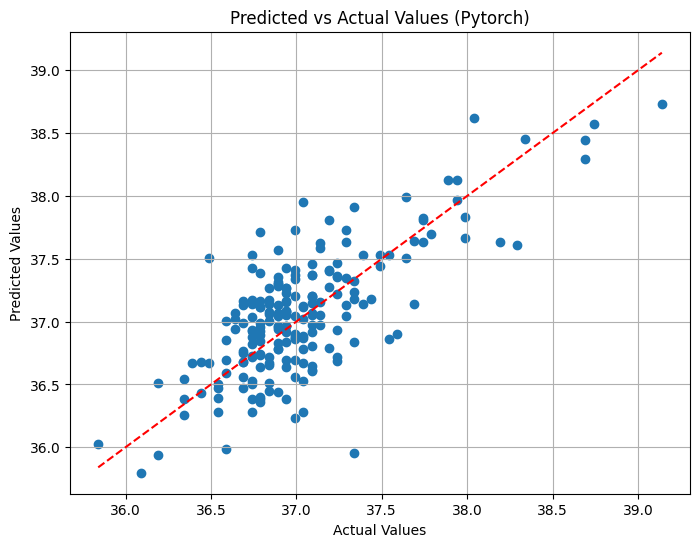

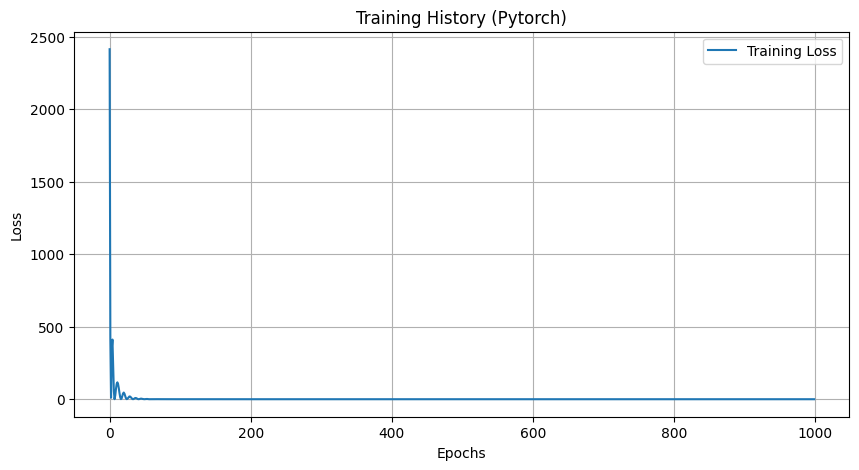

In [16]:
# Visualize the predictions
plot_predictions(y_test, y_pred, "Pytorch")

# Visualize the training history (if available)
plot_training_history(history, "Pytorch")

# Save the model's state dictionary
torch.save(model.state_dict(), 'Pytorch_model.pth')

## **3️⃣ Deep Learning dengan TensorFlow**

### **3.1 Import Library**

In [17]:
# import untuk menambah layer pada model
import tensorflow as tf
from tensorflow import keras
# untuk membuat model neural network
from keras.models import Sequential
# untuk menambah layer pada model
from keras.layers import Dense, Input

### **3.2 Susun Susun Model Neural Network**

In [18]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

# Inisialisasi model sequential
model_tf = Sequential([
    Input(shape=(input_dim,)), # Input layer
    Dense(hidden_dim, activation='relu') , # Layer input 128 neuron
    Dense(output_dim)  # Layer output 1 neuron
])

### **3.3 Compile Model**

In [19]:
# Compile model (tentukan optimizer, loss function, dan metrics)
model_tf.compile(optimizer='adam', loss='mse', metrics=['mae']) # Contoh penggunaan Adam optimizer dan Mean Squared Error loss

# Print model summary
model_tf.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

### **3.4 Training Model**

In [20]:
# Train the TensorFlow/Keras model
history_tf = model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 71.6830 - mae: 6.9357 - val_loss: 14.2847 - val_mae: 3.5479
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3576 - mae: 2.2680 - val_loss: 0.7910 - val_mae: 0.7548
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1124 - mae: 0.8800 - val_loss: 0.4627 - val_mae: 0.5469
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5396 - mae: 0.5929 - val_loss: 0.3306 - val_mae: 0.4715
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2785 - mae: 0.4239 - val_loss: 0.2046 - val_mae: 0.3640
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1603 - mae: 0.3186 - val_loss: 0.1689 - val_mae: 0.3272
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1524 - mae: 0.3051 - val_loss: 0.1922 - val_mae: 0.3401
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1654 - mae: 0.3224 - val_loss: 0.1566 - val_mae: 0.3104
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

### **3.5 Evaluasi Model**

In [21]:
# Make predictions on the test set
y_pred_tf = model_tf.predict(X_test)

# Evaluate the TensorFlow
evaluation_results_tf = evaluate_model(y_test, y_pred_tf)

# Print the evaluation metrics
print("TensorFlow= Evaluation Results:")
for metric, value in evaluation_results_tf.items():
    print(f"{metric}: {value}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
TensorFlow= Evaluation Results:
MSE: 0.07636338716134088
RMSE: 0.2763392609842852
R-squared: 0.6373528392001566


### **3.6 Visualisasi Prediksi Model**

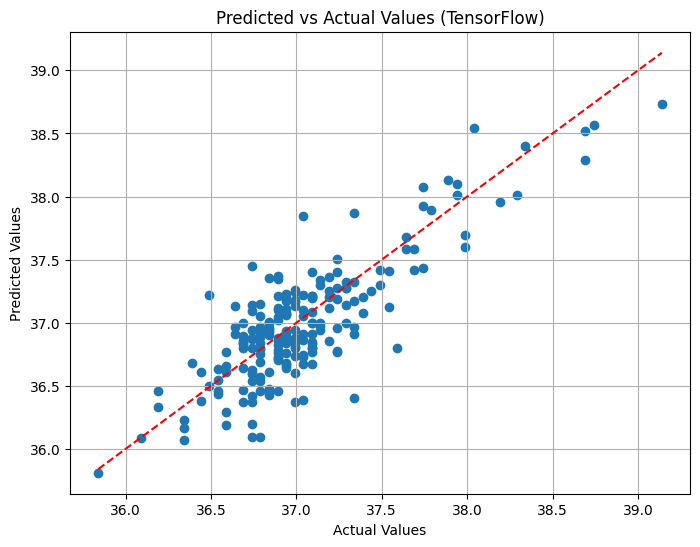

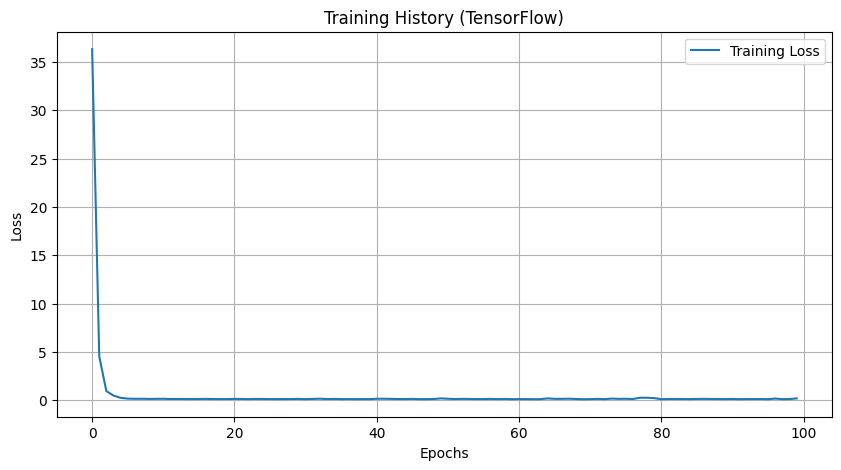

In [22]:
# Visualize the predictions
plot_predictions(y_test, y_pred_tf, "TensorFlow")

# Visualize the training history
plot_training_history(pd.DataFrame(history_tf.history), "TensorFlow")

# Save the TensorFlow model
model_tf.save('tensorflow_model.keras')

# 📊 Analisis Matematis Model Regresi Dataset Infrared 🔍

Pemodelan regresi menggunakan dataset infrared melibatkan beberapa persamaan matematis yang fundamental dalam pengembangan sistem prediktif. Berikut diuraikan konsep-konsep matematis yang melandasi implementasi model tersebut:

## 📏 Metrik Evaluasi Model

### 🎯 MSE (Mean Squared Error)
MSE merupakan metrik evaluasi yang mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2$$

Dimana:
- $n$ adalah jumlah sampel data
- $y_{\text{true},i}$ adalah nilai sebenarnya untuk sampel ke-$i$
- $y_{\text{pred},i}$ adalah nilai prediksi untuk sampel ke-$i$

### 📉 RMSE (Root Mean Squared Error)
RMSE merupakan akar kuadrat dari MSE, memberikan interpretasi error dalam dimensi yang sama dengan variabel target:

$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}$$

### 📈 R-squared (R²)
R² mengukur proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh model:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y}_{\text{true}})^2}$$

## 🧠 Arsitektur Jaringan Neural

Kedua implementasi model (PyTorch dan TensorFlow) menerapkan arsitektur neural network dengan struktur sebagai berikut:

### 🔄 Pemrosesan Forward
$$h = \text{ReLU}(W_1 \cdot x + b_1)$$
$$\hat{y} = W_2 \cdot h + b_2$$

Komponen-komponen utama:
- 📥 $x$ : vektor input dengan dimensi `input_size`
- 🧮 $W_1$ dan $b_1$ : parameter layer pertama
- 💡 $h$ : output hidden layer dengan dimensi `hidden_size`
- 🧮 $W_2$ dan $b_2$ : parameter layer output
- 📤 $\hat{y}$ : prediksi model

### 🔋 Fungsi Aktivasi ReLU
ReLU (Rectified Linear Unit) merupakan fungsi aktivasi non-linear yang didefinisikan sebagai:

$$\text{ReLU}(z) = \max(0, z)$$

Fungsi ini berperan penting dalam memampukan model mempelajari pola non-linear dalam data.

## ⚙️ Algoritma Optimisasi Adam

Kedua implementasi menggunakan algoritma Adam yang mengintegrasikan kelebihan dari dua algoritma optimisasi:
- 🔄 AdaGrad (kemampuan adaptasi dengan gradien jarang)
- 🔄 RMSProp (kemampuan adaptasi dengan perubahan fungsi objektif bermagnitudo tinggi)

Persamaan pembaruan parameter Adam:

$$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$
$$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$
$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$
$$\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t$$

## 📉 Fungsi Loss MSE

Model mengimplementasikan MSE sebagai fungsi loss dengan persamaan:

$$\mathcal{L}(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - f_\theta(x_i))^2$$

Dimana:
- 🧮 $\theta$ : parameter model
- 🔄 $f_\theta(x_i)$ : output model untuk input $x_i$
- 📊 $n$ : jumlah sampel data

Pemahaman mendalam terhadap persamaan-persamaan matematis ini memberikan fondasi teoretis yang kokoh dalam pengembangan dan evaluasi model pembelajaran mesin untuk dataset inframerah. 🔬🧪